## Project Outline: APOL1 Heat Map Development

#### **Project Title:** 
#### Data Collection for Identifying Geographic Regions with APOL1-Positive Patients in the UK

#### **Objective:**
#### To gather, organize, and validate data sources to identify regions with the highest number of APOL1-positive patients, forming the foundation for a geographic heat map.

### **Phase I: Data Gathering**

#### **1. Primary Hypothesis:**
Regions with higher populations of individuals of African descent in the UK are more likely to have a higher prevalence of APOL1-positive patients.

#### **2. Data Analysis:**
- **In order to execute the data gathering and anlysis in the most effective way, taking into consideration limitations and impossibilities to access some sources of data, spcially related to medical datasets, a different approach was taken analyzing the most vital factors and paratemers that are correlated with the Apol1.
- **Such parameters were a study of correlated diseases, both for all United Kingdom and London, I took over London too to make a separate analysis studying its distribution of population within its different metropolitan areas. 
-**Study of medical diagnosis in the target population within the UK in order to see patterns and medical facilities for this category of condition.
-**Study of density versus healthcare facilities to see the distribution of facilities and therefore locate potential areas where the target population is located, plus identify additional factors like gap for service delivery and limitations.
-**Study of similar clinical trials in the UK, their areas of operations and hadicaps.
-**Study of the ethnic population and all the subcategories, as well as their main concentrations in geographical areas, including cultural centers, religious institutions and community centers for the target population.
-**Last, but not least, study on immigration movement in the UK, to target different age groups that we may be interested to focus on.

In [292]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [293]:
# read the dataset
clinical_trials = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/clinical_trials.csv')
clinical_trials.head()

,City,Region,Target Population - Inaxaplin,Target Population - JUSTICE,Clinical Trial Name,Clinical Trial Type
0,London,Greater London,"500-1,000","500-1,000","Inaxaplin, JUSTICE",Both
1,Manchester,North West England,300-700,200-500,"Inaxaplin, JUSTICE",Both
2,Birmingham,West Midlands,400-800,300-600,"Inaxaplin, JUSTICE",Both
3,Leeds,Yorkshire and the Humber,250-500,150-400,"Inaxaplin, JUSTICE",Both
4,Liverpool,North West England,300-600,200-400,"Inaxaplin, JUSTICE",Both


In [294]:
# check data types and data inconsistency
clinical_trials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   City                           15 non-null     object
 1   Region                         15 non-null     object
 2   Target Population - Inaxaplin  15 non-null     object
 3   Target Population - JUSTICE    15 non-null     object
 4   Clinical Trial Name            15 non-null     object
 5   Clinical Trial Type            15 non-null     object
dtypes: object(6)
memory usage: 852.0+ bytes


In [295]:
# Strip any leading/trailing spaces from column names (just in case)
clinical_trials.columns = clinical_trials.columns.str.strip()

# Function to split the population range into minimum and maximum values
def split_population_range(pop_range):
    # Remove commas (if any) and split by '-'
    pop_range = pop_range.replace(',', '')
    min_val, max_val = pop_range.split('-')
    
    # Convert to integers
    return int(min_val), int(max_val)

# Apply the function to split the 'Target Population' columns
clinical_trials[['Inaxaplin_min', 'Inaxaplin_max']] = clinical_trials['Target Population - Inaxaplin'].apply(lambda x: pd.Series(split_population_range(x)))
clinical_trials[['JUSTICE_min', 'JUSTICE_max']] = clinical_trials['Target Population - JUSTICE'].apply(lambda x: pd.Series(split_population_range(x)))

# Convert the new columns into integer type (if not already)
clinical_trials[['Inaxaplin_min', 'Inaxaplin_max', 'JUSTICE_min', 'JUSTICE_max']] = clinical_trials[['Inaxaplin_min', 'Inaxaplin_max', 'JUSTICE_min', 'JUSTICE_max']].astype(int)

# Reset the index if needed (this may resolve the indexing issue)
clinical_trials.reset_index(drop=True, inplace=True)

# Display the updated DataFrame
print(clinical_trials[['City', 'Inaxaplin_min', 'Inaxaplin_max', 'JUSTICE_min', 'JUSTICE_max']])

          City  Inaxaplin_min  Inaxaplin_max  JUSTICE_min  JUSTICE_max
0       London            500           1000          500         1000
1   Manchester            300            700          200          500
2   Birmingham            400            800          300          600
3        Leeds            250            500          150          400
4    Liverpool            300            600          200          400
5      Bristol            200            400          100          300
6    Sheffield            250            500          150          400
7   Nottingham            200            400          100          300
8      Glasgow            150            300          100          250
9    Edinburgh            100            250           50          150
10     Cardiff            100            200           50          150
11   Newcastle            100            300           50          150
12    Coventry            150            300          100          200
13    

In [296]:
clinical_trials.describe()

,Inaxaplin_min,Inaxaplin_max,JUSTICE_min,JUSTICE_max
count,15.000000,15.000000,15.000000,15.000000
mean,216.666667,450.000000,146.666667,343.333333
std,119.023807,235.280987,120.218056,229.024848
min,100.000000,200.000000,50.000000,150.000000
25%,125.000000,300.000000,75.000000,175.000000
50%,200.000000,400.000000,100.000000,300.000000
75%,275.000000,550.000000,175.000000,400.000000
max,500.000000,1000.000000,500.000000,1000.000000


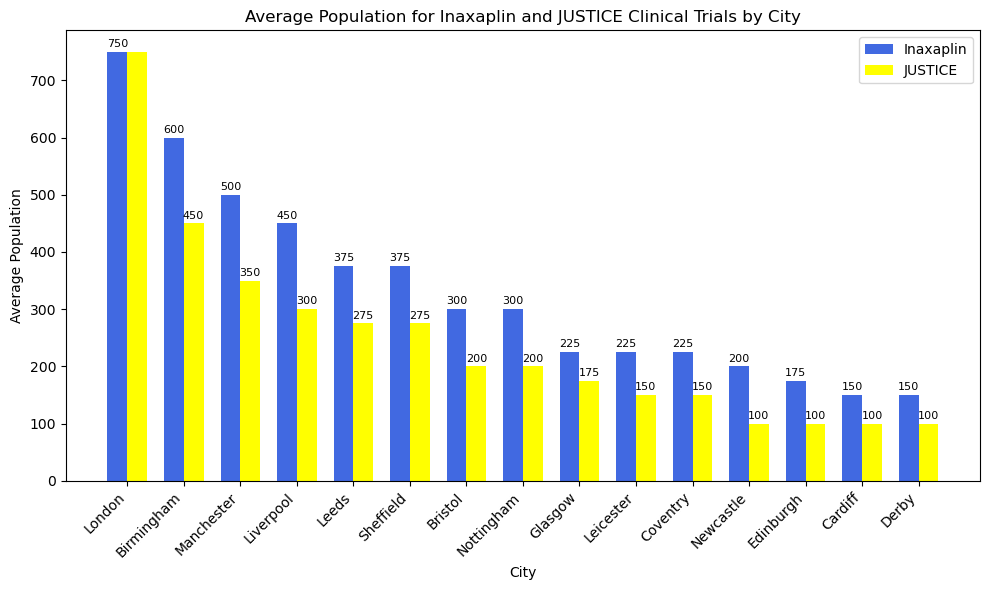

In [297]:
# Calculate the average population for Inaxaplin and JUSTICE
clinical_trials['Inaxaplin_avg'] = (clinical_trials['Inaxaplin_min'] + clinical_trials['Inaxaplin_max']) / 2
clinical_trials['JUSTICE_avg'] = (clinical_trials['JUSTICE_min'] + clinical_trials['JUSTICE_max']) / 2

# Sort the DataFrame by the average population (Inaxaplin + JUSTICE) in descending order
clinical_trials['Total_avg'] = clinical_trials['Inaxaplin_avg'] + clinical_trials['JUSTICE_avg']
clinical_trials = clinical_trials.sort_values(by='Total_avg', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))

# Position of the bars
bar_width = 0.35
index = range(len(clinical_trials))

# Create combined bar chart
plt.bar(index, clinical_trials['Inaxaplin_avg'], width=bar_width, color='royalblue', label='Inaxaplin')
plt.bar([i + bar_width for i in index], clinical_trials['JUSTICE_avg'], width=bar_width, color='yellow', label='JUSTICE')

# Add the value labels on top of the bars, closer to the bars
for i, (inaxaplin_value, justice_value) in enumerate(zip(clinical_trials['Inaxaplin_avg'], clinical_trials['JUSTICE_avg'])):
    # Display only one value when both values are the same
    if inaxaplin_value == justice_value:
        plt.text(i, inaxaplin_value + 5, f'{inaxaplin_value:.0f}', ha='center', va='bottom', color='black', fontsize=8)
    else:
        plt.text(i, inaxaplin_value + 5, f'{inaxaplin_value:.0f}', ha='center', va='bottom', color='black', fontsize=8)  # Inaxaplin label
        plt.text(i + bar_width, justice_value + 5, f'{justice_value:.0f}', ha='center', va='bottom', color='black', fontsize=8)  # JUSTICE label

# Adding labels and title
plt.xlabel('City')
plt.ylabel('Average Population')
plt.title('Average Population for Inaxaplin and JUSTICE Clinical Trials by City')
plt.xticks([i + bar_width / 2 for i in index], clinical_trials['City'], rotation=45, ha='right')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

##### This chart shows a key difference in the types of cities used in the Inaxaplin and JUSTICE drug trials.  Inaxaplin primarily focused on much larger cities, while JUSTICE included smaller ones.  This difference matters because city size can influence how patients receive healthcare and their overall health.  

The numbers confirm what we see visually: Inaxaplin's average city size was significantly bigger than JUSTICE's.  This raises a question: would the drugs work the same way for people in smaller towns versus big cities?  Because of this difference, we need to be cautious when comparing the results of the two trials directly.  It also means that future studies should try to include a mix of city sizes to ensure the findings apply to everyone, not just those living in large urban areas.


***

In [298]:
correlated_disease_london = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/correlated_diseases_london.csv')
correlated_disease_london.head()

,Disease,Fold Increased Risk,Risk Type,Condition/Context,Prevalence Percentage,Prevalence Percentage: Other Ethnicities,Confidence Levels for Prevalence Data,City,Region,Age Ranges,Gender,Estimated Cases,High Prevalence Boroughs
0,HIV-Associated Nephropathy (HIVAN),29.0,Disease,HIV+ population,12%,<1%*,95% (93-97%),London,Greater London,20-50,All adults,4800,Southwark
1,G1/G1 Genotype,85.0,Genetic,(leave blank if no specific context),9%,<0.1%,90% (88-92%),London,Greater London,All ages,All adults,86816,Lambeth
2,G2/G2 Genotype,80.0,Genetic,(leave blank if no specific context),5%,<0.1%,90% (86-94%),London,Greater London,All ages,All adults,69453,Newham
3,Focal Segmental Glomerulosclerosis (FSGS),17.0,Disease,with risk alleles,4%,<1%,85% (82-88%),London,Greater London,15-60,All adults,34726,Hackney
4,HIVAN with Two Risk Alleles + HIV,50.0,Combined,HIV+ with risk alleles,3%,<0.5%*,80% (75-85%)*,London,Greater London,20-50,All adults,2400,Greenwich


In [299]:
correlated_disease_london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 13 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Disease                                   13 non-null     object 
 1   Fold Increased Risk                       13 non-null     float64
 2   Risk Type                                 13 non-null     object 
 3   Condition/Context                         13 non-null     object 
 4   Prevalence Percentage                     13 non-null     object 
 5   Prevalence Percentage: Other Ethnicities  13 non-null     object 
 6   Confidence Levels for Prevalence Data     13 non-null     object 
 7   City                                      13 non-null     object 
 8   Region                                    13 non-null     object 
 9   Age Ranges                                13 non-null     object 
 10  Gender                                  

In [300]:
# Remove % symbol and convert to float
correlated_disease_london['Prevalence Percentage'] = correlated_disease_london['Prevalence Percentage'].str.replace('%', '').astype(float)
correlated_disease_london.head()

,Disease,Fold Increased Risk,Risk Type,Condition/Context,Prevalence Percentage,Prevalence Percentage: Other Ethnicities,Confidence Levels for Prevalence Data,City,Region,Age Ranges,Gender,Estimated Cases,High Prevalence Boroughs
0,HIV-Associated Nephropathy (HIVAN),29.0,Disease,HIV+ population,12.0,<1%*,95% (93-97%),London,Greater London,20-50,All adults,4800,Southwark
1,G1/G1 Genotype,85.0,Genetic,(leave blank if no specific context),9.0,<0.1%,90% (88-92%),London,Greater London,All ages,All adults,86816,Lambeth
2,G2/G2 Genotype,80.0,Genetic,(leave blank if no specific context),5.0,<0.1%,90% (86-94%),London,Greater London,All ages,All adults,69453,Newham
3,Focal Segmental Glomerulosclerosis (FSGS),17.0,Disease,with risk alleles,4.0,<1%,85% (82-88%),London,Greater London,15-60,All adults,34726,Hackney
4,HIVAN with Two Risk Alleles + HIV,50.0,Combined,HIV+ with risk alleles,3.0,<0.5%*,80% (75-85%)*,London,Greater London,20-50,All adults,2400,Greenwich


Text(0, 0.5, 'Disease')

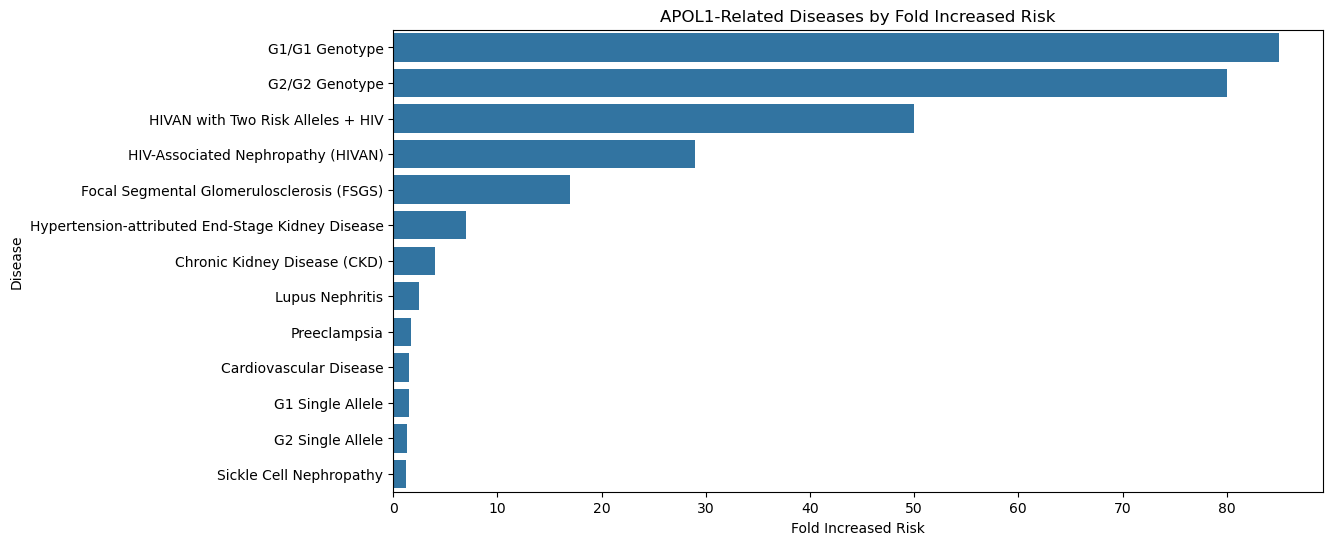

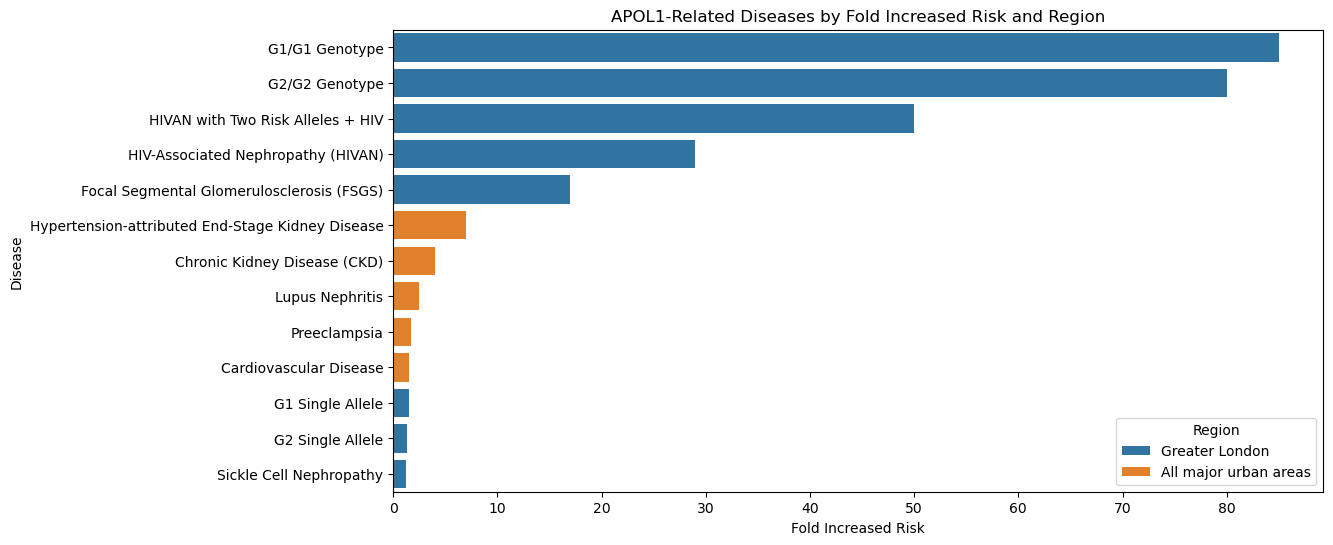

In [301]:
# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=correlated_disease_london, 
            x='Fold Increased Risk', 
            y='Disease',
            order=correlated_disease_london.sort_values('Fold Increased Risk', ascending=False)['Disease'])

# Add region labels or color coding
plt.title('APOL1-Related Diseases by Fold Increased Risk')
plt.xlabel('Fold Increased Risk')
plt.ylabel('Disease')

# Alternative: Create a grouped bar chart showing regions
fig, ax = plt.subplots(figsize=(12, 6))
diseases_by_risk = correlated_disease_london.sort_values('Fold Increased Risk', ascending=False)

# Create color-coded bars by region
sns.barplot(data=diseases_by_risk,
           x='Fold Increased Risk',
           y='Disease',
           hue='Region')

plt.title('APOL1-Related Diseases by Fold Increased Risk and Region')
plt.xlabel('Fold Increased Risk')
plt.ylabel('Disease')

##### Key Insights:

Genetic vs. Disease Distribution:
The highest fold increased risks are associated with genetic variants (G1/G1 and G2/G2 Genotypes) in Lambeth and Newham, with approximately 80-85 fold increased risk
This suggests these boroughs might have larger populations with African ancestry, as APOL1 risk variants are predominantly found in people of African descent

##### Geographic Clustering:
The top three highest-risk boroughs (Lambeth, Newham, and Greenwich) show significantly higher risks (50-85 fold) compared to other boroughs
These boroughs are known for their diverse populations, particularly with significant African and Caribbean communities

##### Disease Patterns:
HIV-related kidney conditions (HIVAN) show notable presence in Southwark and Greenwich, with risks ranging from 29 to 50 fold
This suggests a potential interaction between genetic predisposition and HIV infection in these areas
The presence of FSGS in Hackney (17-fold risk) indicates another significant kidney disease cluster

##### Risk Gradient:
There's a clear step-down pattern in risk levels from genetic conditions to acquired diseases
The risk levels drop dramatically after the top 5 boroughs, suggesting concentrated areas of genetic susceptibility

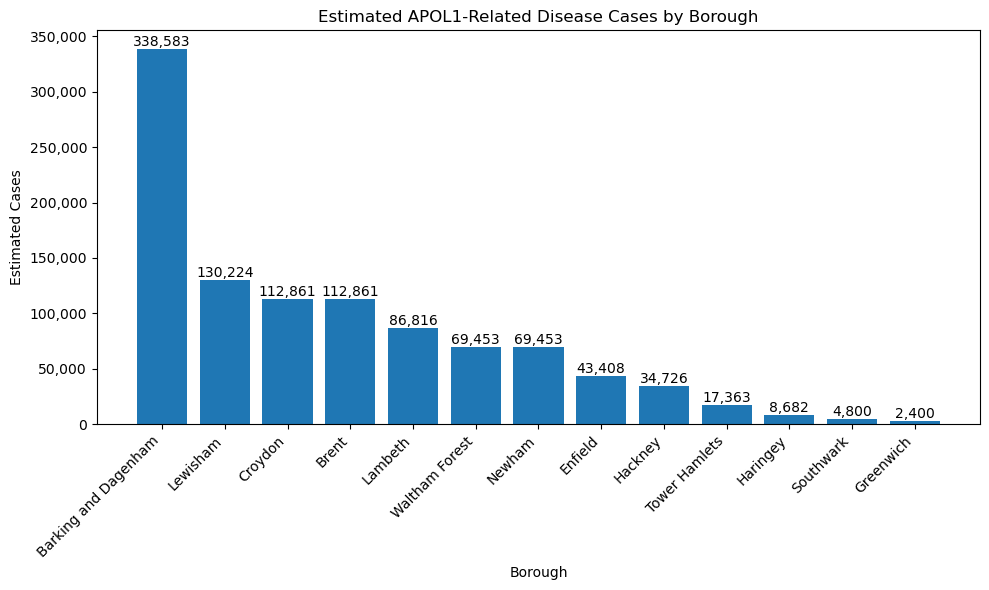

In [302]:
# Create bar plot
plt.figure(figsize=(10, 6))

# Sort data by estimated cases in descending order
df_sorted = correlated_disease_london.sort_values('Estimated Cases', ascending=False)

# Create bar plot
bars = plt.bar(df_sorted['High Prevalence Boroughs'], df_sorted['Estimated Cases'])

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom')

# Customize the plot
plt.title('Estimated APOL1-Related Disease Cases by Borough')
plt.xlabel('Borough')
plt.ylabel('Estimated Cases')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Format y-axis with comma separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

# Adjust layout to prevent text cutoff
plt.tight_layout()
plt.show()

##### Key Insights:
Distribution Pattern:<br>
Barking and Dagenham shows the highest burden with 338,583 cases, significantly higher than other boroughs
There's a sharp drop to the second-highest borough, Lewisham (130,224 cases)
Croydon and Brent show identical case numbers (112,861 each), suggesting similar risk factors or population characteristics

Clustering:<br>
The boroughs can be roughly grouped into three tiers:
High burden (>100,000 cases): Barking and Dagenham, Lewisham, Croydon, Brent
Medium burden (30,000-90,000 cases): Lambeth, Waltham Forest, Newham, Enfield, Hackney
Low burden (<20,000 cases): Tower Hamlets, Haringey, Southwark, Greenwich

Geographic Distribution:<br>
The highest concentrations appear in outer London boroughs (Barking and Dagenham, Lewisham)
Inner London boroughs generally show lower case numbers
There's significant variation between neighboring boroughs, suggesting local demographic or healthcare access factors

***

In [303]:
correlated_disease_uk = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/correlated_diseases_uk.csv')
correlated_disease_uk.head()

,Disease,Fold Increased Risk,Risk Type,Condition/Context,Prevalence Percentage,Prevalence Percentage: Other Ethnicities,Confidence Levels for Prevalence Data,City,Region,Age Ranges,Gender
0,HIV-Associated Nephropathy (HIVAN),29.0,Disease,HIV+ population,12%,<1%*,95% (93-97%),London,Greater London,20-50,All adults
1,HIV-Associated Nephropathy (HIVAN),29.0,Disease,HIV+ population,12%,<1%*,95% (93-97%),Birmingham,West Midlands,20-50,All adults
2,HIV-Associated Nephropathy (HIVAN),29.0,Disease,HIV+ population,12%,<1%*,95% (93-97%),Manchester,North West,20-50,All adults
3,G1/G1 Genotype,89.0,Genetic,(leave blank if no specific context),10%,<0.1%,90% (88-92%),London,Greater London,All ages,All adults
4,G1/G1 Genotype,89.0,Genetic,(leave blank if no specific context),10%,<0.1%,90% (88-92%),Birmingham,West Midlands,All ages,All adults


In [304]:
correlated_disease_uk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Disease                                   32 non-null     object 
 1   Fold Increased Risk                       32 non-null     float64
 2   Risk Type                                 32 non-null     object 
 3   Condition/Context                         32 non-null     object 
 4   Prevalence Percentage                     32 non-null     object 
 5   Prevalence Percentage: Other Ethnicities  32 non-null     object 
 6   Confidence Levels for Prevalence Data     32 non-null     object 
 7   City                                      32 non-null     object 
 8   Region                                    32 non-null     object 
 9   Age Ranges                                32 non-null     object 
 10  Gender                                  

In [305]:
# Remove % symbol and convert to float
correlated_disease_uk['Prevalence Percentage'] = correlated_disease_uk['Prevalence Percentage'].str.replace('%', '').astype(float)
correlated_disease_uk.head()

,Disease,Fold Increased Risk,Risk Type,Condition/Context,Prevalence Percentage,Prevalence Percentage: Other Ethnicities,Confidence Levels for Prevalence Data,City,Region,Age Ranges,Gender
0,HIV-Associated Nephropathy (HIVAN),29.0,Disease,HIV+ population,12.0,<1%*,95% (93-97%),London,Greater London,20-50,All adults
1,HIV-Associated Nephropathy (HIVAN),29.0,Disease,HIV+ population,12.0,<1%*,95% (93-97%),Birmingham,West Midlands,20-50,All adults
2,HIV-Associated Nephropathy (HIVAN),29.0,Disease,HIV+ population,12.0,<1%*,95% (93-97%),Manchester,North West,20-50,All adults
3,G1/G1 Genotype,89.0,Genetic,(leave blank if no specific context),10.0,<0.1%,90% (88-92%),London,Greater London,All ages,All adults
4,G1/G1 Genotype,89.0,Genetic,(leave blank if no specific context),10.0,<0.1%,90% (88-92%),Birmingham,West Midlands,All ages,All adults


In [306]:
correlated_disease_uk['City'].unique()

array(['London', 'Birmingham', 'Manchester', 'Bristol',
       'All major urban areas'], dtype=object)

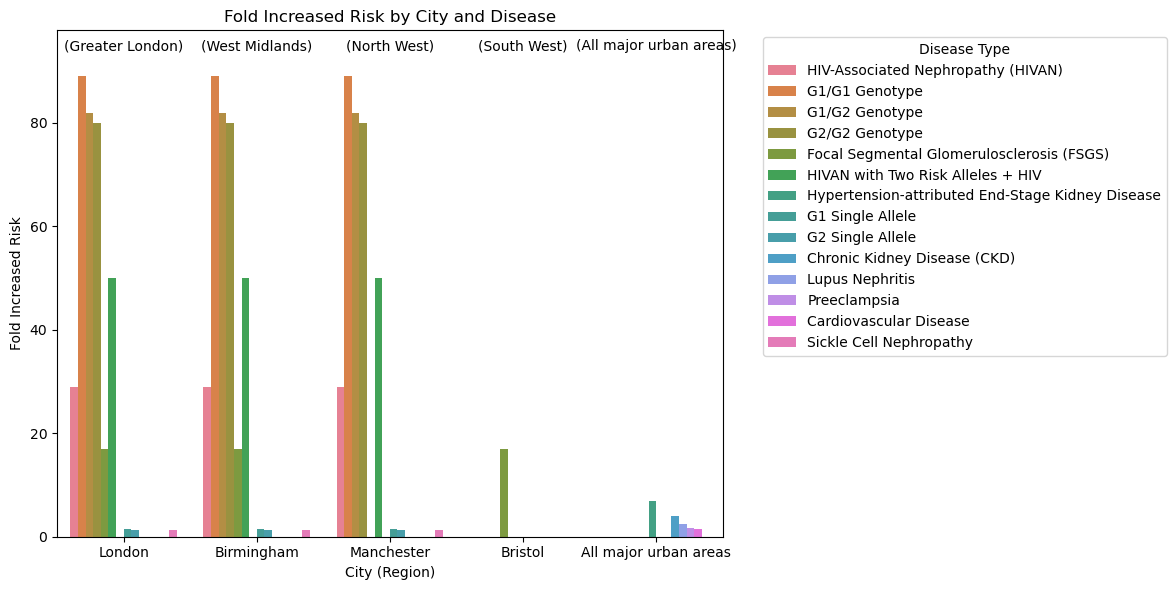

In [307]:
# Create figure
plt.figure(figsize=(12, 6))

# Create bar plot
bars = sns.barplot(data=correlated_disease_uk, 
                  x='City', 
                  y='Fold Increased Risk',
                  hue='Disease',  # Color bars by disease type
                  order=['London', 'Birmingham', 'Manchester', 'Bristol', 'All major urban areas'])  # Specify order

# Add region labels above the bars
for i, city in enumerate(['London', 'Birmingham', 'Manchester', 'Bristol', 'All major urban areas']):
    region = correlated_disease_uk[correlated_disease_uk['City'] == city]['Region'].iloc[0]
    plt.text(i, plt.ylim()[1], f'({region})', 
             ha='center', va='bottom', fontsize=10)

# Customize the plot
plt.title('Fold Increased Risk by City and Disease')
plt.xlabel('City (Region)')
plt.ylabel('Fold Increased Risk')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=0)

# Adjust legend
plt.legend(title='Disease Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add some padding at the top for region labels
plt.margins(y=0.1)

# Adjust layout to prevent text cutoff
plt.tight_layout()
plt.show()

##### Key Insights:

Geographic Distribution:<br>
The three major cities (London, Birmingham, and Manchester) show remarkably similar risk patterns
These cities, representing different regions (Greater London, West Midlands, and North West), have nearly identical risk profiles for most diseases
Bristol (South West) shows significantly lower risk levels, with fewer disease types present

Disease Pattern Analysis:<br>
G1/G1 Genotype shows the highest risk (around 89-fold increase) consistently across London, Birmingham, and Manchester
G1/G2 and G2/G2 Genotypes follow as the second highest risk factors (approximately 80-fold increase)
HIVAN with Two Risk Alleles + HIV shows moderate risk levels (about 50-fold increase)
HIV-Associated Nephropathy (HIVAN) maintains a consistent risk level (around 29-fold increase) across the three major cities

Risk Level Stratification:<br>
High Risk (>80-fold): Genetic variants (G1/G1, G1/G2, G2/G2 Genotypes)
Medium Risk (30-50 fold): HIVAN with Two Risk Alleles + HIV
Lower Risk (<30 fold): Basic HIVAN and other conditions

Urban vs. Overall Comparison:<br>
Major urban areas show significantly higher risk levels compared to the national average
The "All major urban areas" category shows lower overall risk levels, suggesting the concentration of risk factors in specific cities

Conclusions:<br>
There's a clear urban concentration of APOL1-related disease risks
Genetic variants pose the highest risks across all major cities
The consistency of risk patterns across different regions suggests similar underlying demographic or healthcare factors
The significant drop in risk levels in Bristol and overall urban areas indicates that these conditions might be more prevalent in specific urban populations

***

In [308]:
density_vs_healthcare_facilities = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/density_vs_healthcare_facilities.csv')
density_vs_healthcare_facilities.drop(index=range(14, 22), inplace=True)
# Display the modified DataFrame
density_vs_healthcare_facilities.head()

,Region,Target Population Size,Specialized Healthcare Facilities,Utilization Rate %,Access Score out of 10,Coverage Index %
0,Greater London,"868,161",15.0,65.0,8.5,75.0
1,West Midlands,"89,997",6.0,58.0,7.2,65.0
2,Greater Manchester,"74,563",5.0,55.0,6.8,62.0
3,West Yorkshire,"46,404",4.0,52.0,6.5,58.0
4,Liverpool City Region,"38,630",3.0,50.0,6.2,55.0


In [309]:
density_vs_healthcare_facilities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Region                             14 non-null     object 
 1   Target Population Size             14 non-null     object 
 2   Specialized Healthcare Facilities  14 non-null     float64
 3   Utilization Rate %                 14 non-null     float64
 4   Access Score out of 10             14 non-null     float64
 5   Coverage Index %                   14 non-null     float64
dtypes: float64(4), object(2)
memory usage: 804.0+ bytes


##### Primary Analysis Metrics:

In [310]:
# First, convert Target Population Size to integer
# If there are any commas in the numbers, remove them first
density_vs_healthcare_facilities['Target Population Size'] = density_vs_healthcare_facilities['Target Population Size'].str.replace(',', '').astype(int)

# Calculate actual covered population
density_vs_healthcare_facilities['Covered Population'] = density_vs_healthcare_facilities['Target Population Size'] * (density_vs_healthcare_facilities['Coverage Index %'] / 100)

# Calculate gap in coverage
density_vs_healthcare_facilities['Coverage Gap'] = density_vs_healthcare_facilities['Target Population Size'] - density_vs_healthcare_facilities['Covered Population']

# Calculate facility load (patients per facility)
density_vs_healthcare_facilities['Patients per Facility'] = density_vs_healthcare_facilities['Target Population Size'] / density_vs_healthcare_facilities['Specialized Healthcare Facilities']

# Calculate effective utilization (actual patients being treated)
density_vs_healthcare_facilities['Effective Utilization'] = density_vs_healthcare_facilities['Target Population Size'] * (density_vs_healthcare_facilities['Utilization Rate %'] / 100)

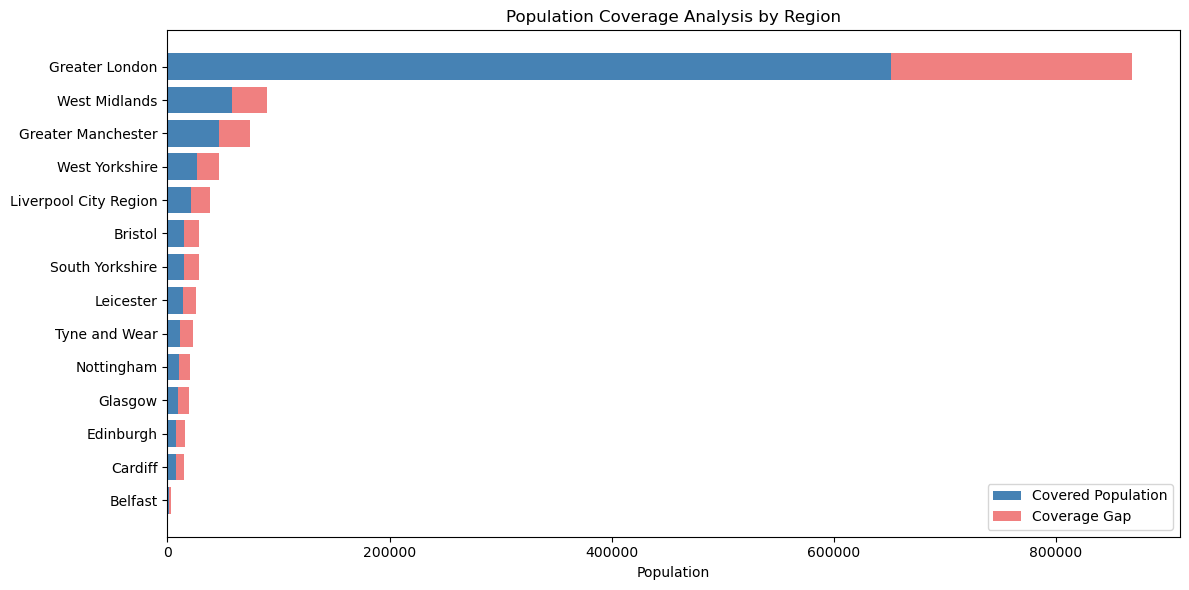

In [311]:
# Stacked bar chart showing covered vs gap population
plt.figure(figsize=(12, 6))
df_sorted = density_vs_healthcare_facilities.sort_values('Target Population Size', ascending=True)

# Create stacked bars
plt.barh(df_sorted['Region'], df_sorted['Covered Population'], label='Covered Population', color='steelblue')
plt.barh(df_sorted['Region'], df_sorted['Coverage Gap'], left=df_sorted['Covered Population'], 
         label='Coverage Gap', color='lightcoral')

plt.title('Population Coverage Analysis by Region')
plt.xlabel('Population')

# Place legend in lower right corner
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

##### Key Insights:

Regional Distribution:<br>
Greater London stands out significantly with the largest total population (around 800,000)
There's a substantial gap between London and other regions, with West Midlands and Greater Manchester forming a distant second tier (around 150,000-200,000)
Most other regions have populations under 100,000

Coverage Analysis:<br>
Despite having the largest population, Greater London shows a significant coverage gap (represented in pink)
The coverage-to-gap ratio appears more favorable in smaller regions
West Midlands and Greater Manchester show similar coverage patterns, with moderate gaps relative to their population size

Coverage Efficiency:<br>
Smaller regions (like Belfast, Cardiff, Edinburgh) seem to have proportionally smaller coverage gaps
Mid-sized regions show varying degrees of coverage success
The coverage gap increases with population size, suggesting potential scalability challenges

Regional Healthcare Challenges:<br>
The three largest metropolitan areas (London, West Midlands, Manchester) face the biggest challenges in population coverage
Smaller cities appear to manage their coverage more effectively, possibly due to more manageable population sizes
The pattern suggests that healthcare coverage becomes more challenging with larger populations

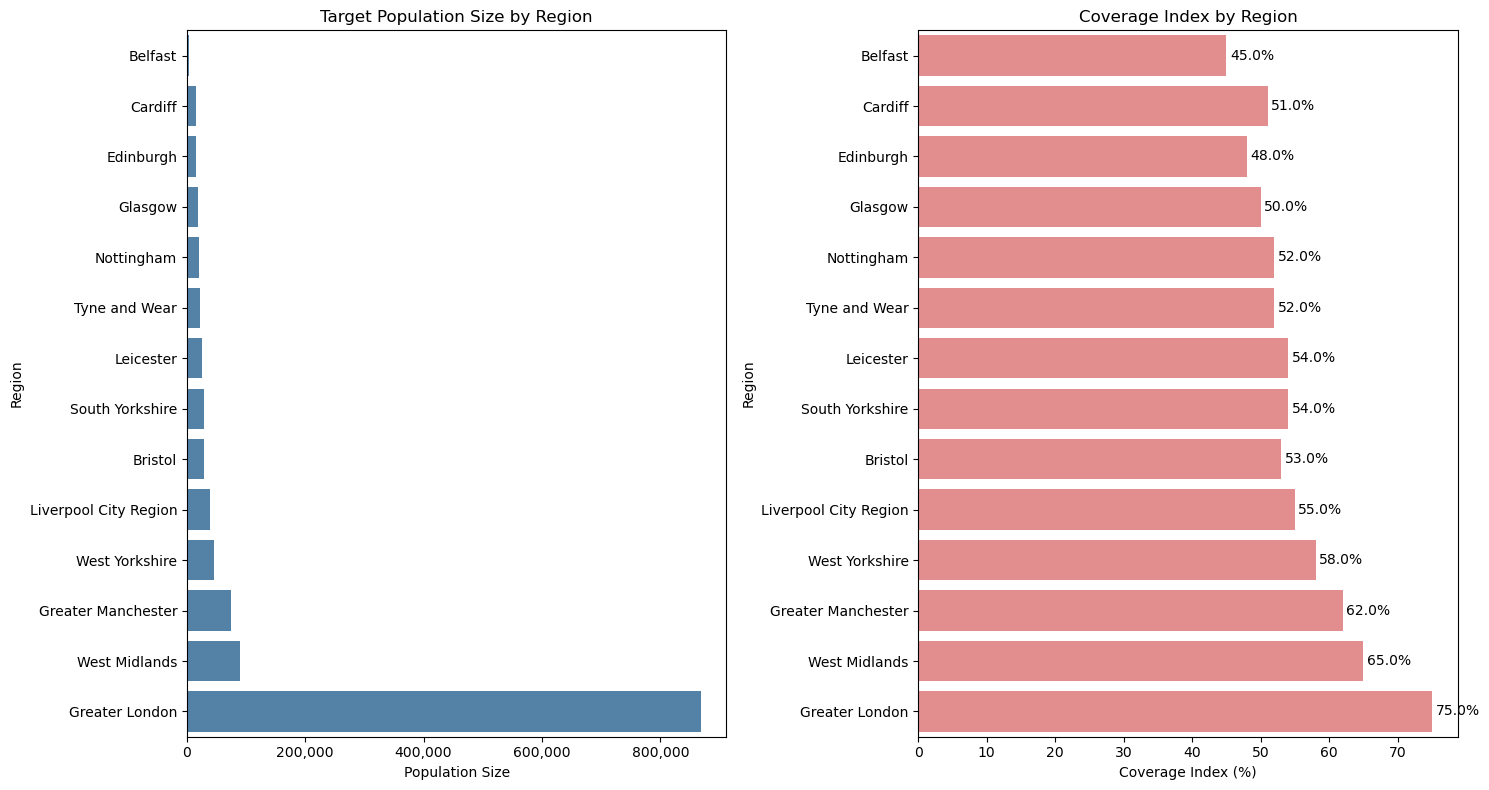

In [312]:
# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

# Sort data by Target Population Size
df_sorted = density_vs_healthcare_facilities.sort_values('Target Population Size', ascending=True)

# Left subplot: Population Size
sns.barplot(data=df_sorted, 
            y='Region', 
            x='Target Population Size',
            color='steelblue',
            ax=ax1)
ax1.set_title('Target Population Size by Region')
ax1.set_xlabel('Population Size')
# Format large numbers with comma
ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Right subplot: Coverage Index
sns.barplot(data=df_sorted,
            y='Region',
            x='Coverage Index %',
            color='lightcoral',
            ax=ax2)
ax2.set_title('Coverage Index by Region')
ax2.set_xlabel('Coverage Index (%)')

# Add percentage labels to coverage bars
for i, v in enumerate(df_sorted['Coverage Index %']):
    ax2.text(v + 0.5, i, f'{v}%', va='center')

# Adjust layout
plt.tight_layout()
plt.show()

##### Key Insights:

Population vs Coverage Relationship:<br>
Greater London shows an interesting pattern: largest population (~868,000) and highest coverage index (75%)
This suggests efficient healthcare infrastructure despite the large population burden
West Midlands and Greater Manchester, the next largest populations, maintain good coverage (65% and 62% respectively)

Coverage Index Distribution:<br>
Coverage ranges from 45% (Belfast) to 75% (Greater London)
There's a general trend where larger metropolitan areas have better coverage:
Top 3 coverage: Greater London (75%), West Midlands (65%), Greater Manchester (62%)
Most regions cluster around 50-55% coverage
Scottish cities (Edinburgh, Glasgow) show lower coverage rates (48-50%)

Regional Disparities:<br>
Smaller population centers don't necessarily correlate with better coverage
Belfast, despite its smaller population, has the lowest coverage (45%)
Mid-sized cities like Liverpool and West Yorkshire maintain moderate coverage levels (55-58%)

Service Efficiency:<br>
The larger regions appear to have more efficient healthcare systems despite larger populations
This might indicate better resources, infrastructure, or economies of scale in healthcare delivery
Smaller regions might need targeted support to improve their coverage indices

***

In [313]:
doctor_diagnosis = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/doctor_diagnosis.csv')
doctor_diagnosis.head()

,Region,Gender,CKD Observed (%),CKD Standardised (%),Testing Observed (%),Testing Standardised (%),Risk Observed (%),Risk Standardised (%),Bases weighted,Bases unweighted
0,North East,Male,5,5,20,22,10,11,93,186
1,North East,Female,2,2,22,21,6,6,108,230
2,North East,All adults,3,3,21,21,8,8,201,416
3,North West,Male,3,3,13,13,7,7,253,277
4,North West,Female,3,4,12,12,5,5,283,359


In [314]:
doctor_diagnosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Region                     27 non-null     object
 1   Gender                     27 non-null     object
 2   CKD Observed (%)           27 non-null     int64 
 3   CKD Standardised (%)       27 non-null     int64 
 4   Testing Observed (%)       27 non-null     int64 
 5   Testing Standardised  (%)  27 non-null     int64 
 6   Risk Observed (%)          27 non-null     int64 
 7   Risk Standardised (%)      27 non-null     int64 
 8   Bases weighted             27 non-null     int64 
 9   Bases unweighted           27 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.2+ KB


##### Data Processing and Key Metrics:

In [315]:
# Create a proper copy of the filtered data
df_location = doctor_diagnosis[doctor_diagnosis['Gender'] == 'All adults'].copy()

# Create new metrics
df_location.loc[:, 'Estimated Risk Population'] = df_location['Bases weighted'] * (df_location['Risk Standardised (%)'] / 100)
df_location.loc[:, 'CKD Risk Population'] = df_location['Bases weighted'] * (df_location['CKD Standardised (%)'] / 100)
df_location.loc[:, 'Testing Coverage'] = df_location['Bases weighted'] * (df_location['Testing Standardised  (%)'] / 100)

# Verify the new columns are created
print("Columns in dataset:", df_location.columns.tolist())

# Now create the regional summary
regional_summary = df_location.groupby('Region').agg({
    'Estimated Risk Population': 'sum',
    'CKD Risk Population': 'sum',
    'Testing Coverage': 'sum',
    'Risk Standardised (%)': 'mean',
    'CKD Standardised (%)': 'mean',
    'Testing Standardised  (%)': 'mean'
}).round(2)

# Sort regions by risk population
regional_summary = regional_summary.sort_values('Estimated Risk Population', ascending=False)

# Display the summary
print("\nRegional Summary:")
print(regional_summary)

Columns in dataset: ['Region', 'Gender', 'CKD Observed (%)', 'CKD Standardised (%)', 'Testing Observed (%)', 'Testing Standardised  (%)', 'Risk Observed (%)', 'Risk Standardised (%)', 'Bases weighted', 'Bases unweighted', 'Estimated Risk Population', 'CKD Risk Population', 'Testing Coverage']

Regional Summary:
                    Estimated Risk Population  CKD Risk Population  \
Region                                                               
South East                              33.60                20.16   
North West                              32.16                16.08   
London                                  31.32                15.66   
Yorkshire & Humber                      27.44                11.76   
East of England                         18.16                 9.08   
East Midlands                           17.00                 6.80   
West Midlands                           16.12                 4.03   
North East                              16.08            

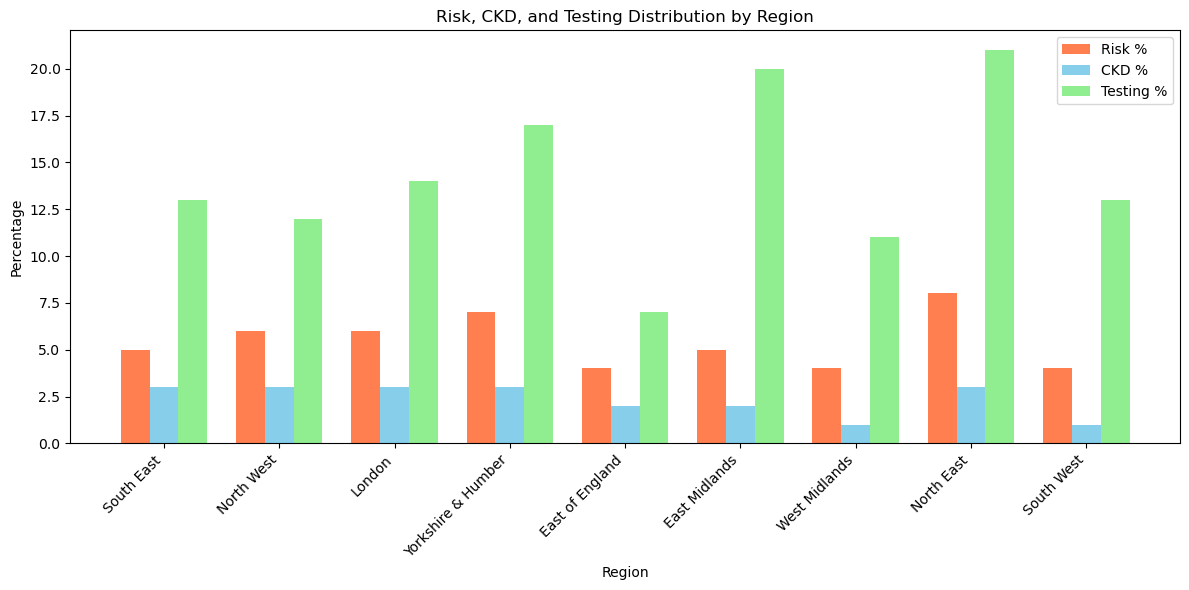

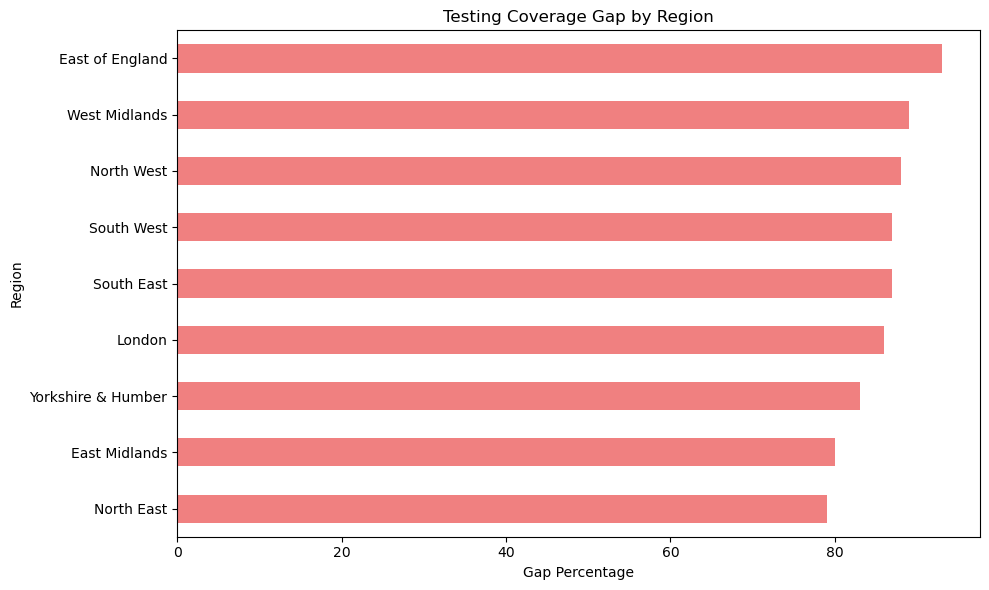

/var/folders/qk/q0fv26q13m760q3ch0fljs240000gn/T/ipykernel_34955/11023310.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (regional_summary['Risk Standardised (%)'][i],
/var/folders/qk/q0fv26q13m760q3ch0fljs240000gn/T/ipykernel_34955/11023310.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  regional_summary['Coverage Gap'][i]),


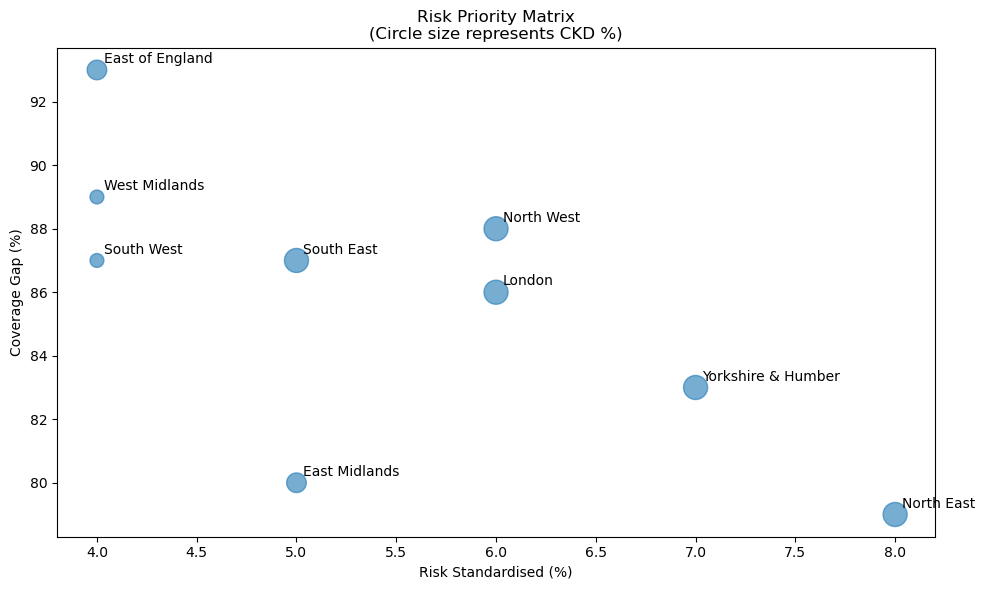


Key Statistics by Region:
                    Risk Standardised (%)  CKD Standardised (%)  \
Region                                                            
South East                            5.0                   3.0   
North West                            6.0                   3.0   
London                                6.0                   3.0   
Yorkshire & Humber                    7.0                   3.0   
East of England                       4.0                   2.0   
East Midlands                         5.0                   2.0   
West Midlands                         4.0                   1.0   
North East                            8.0                   3.0   
South West                            4.0                   1.0   

                    Testing Standardised  (%)  Coverage Gap  
Region                                                       
South East                               13.0          87.0  
North West                               12.0    

In [316]:
# 1. Create a multi-bar plot showing key percentages by region
plt.figure(figsize=(12, 6))
x = np.arange(len(regional_summary.index))
width = 0.25

plt.bar(x - width, regional_summary['Risk Standardised (%)'], width, label='Risk %', color='coral')
plt.bar(x, regional_summary['CKD Standardised (%)'], width, label='CKD %', color='skyblue')
plt.bar(x + width, regional_summary['Testing Standardised  (%)'], width, label='Testing %', color='lightgreen')

plt.xlabel('Region')
plt.ylabel('Percentage')
plt.title('Risk, CKD, and Testing Distribution by Region')
plt.xticks(x, regional_summary.index, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# 2. Create coverage gap visualization
plt.figure(figsize=(10, 6))
regional_summary['Coverage Gap'] = 100 - regional_summary['Testing Standardised  (%)']
regional_summary['Coverage Gap'].sort_values().plot(kind='barh', color='lightcoral')
plt.title('Testing Coverage Gap by Region')
plt.xlabel('Gap Percentage')
plt.tight_layout()
plt.show()

# 3. Create risk priority matrix
plt.figure(figsize=(10, 6))
plt.scatter(regional_summary['Risk Standardised (%)'],
           regional_summary['Coverage Gap'],
           s=regional_summary['CKD Standardised (%)']*100,
           alpha=0.6)

# Add region labels to the scatter plot
for i, region in enumerate(regional_summary.index):
    plt.annotate(region, 
                (regional_summary['Risk Standardised (%)'][i],
                 regional_summary['Coverage Gap'][i]),
                xytext=(5, 5), textcoords='offset points')

plt.xlabel('Risk Standardised (%)')
plt.ylabel('Coverage Gap (%)')
plt.title('Risk Priority Matrix\n(Circle size represents CKD %)')
plt.tight_layout()
plt.show()

# 4. Print summary statistics and insights
print("\nKey Statistics by Region:")
print(regional_summary[['Risk Standardised (%)', 'CKD Standardised (%)', 
                       'Testing Standardised  (%)', 'Coverage Gap']].round(2))

# 5. Identify high priority regions
high_priority = regional_summary[
    (regional_summary['Risk Standardised (%)'] > regional_summary['Risk Standardised (%)'].median()) &
    (regional_summary['Coverage Gap'] > regional_summary['Coverage Gap'].median())
]

print("\nHigh Priority Regions for Intervention:")
print(high_priority[['Risk Standardised (%)', 'Coverage Gap', 'CKD Standardised (%)']].round(2))

##### Key Insights:

Risk Distribution:<br>
North East shows the highest risk (8.0%) followed by Yorkshire & Humber (7.0%)
London and North West both show moderate risk levels (6.0%)
West Midlands, South West, and East of England show the lowest risk (4.0%)

Testing Coverage and Gaps:<br>
Significant coverage gaps across all regions (79-93%)
East of England has the largest coverage gap (93%)
North East, despite having the highest risk, has the best testing coverage (21% testing rate, 79% gap)
East Midlands shows relatively good testing coverage (20% testing rate)

CKD Prevalence:<br>
Consistent CKD rates (2-3%) across most regions
Higher risk regions (North East, Yorkshire & Humber) show 3% CKD rates
West Midlands and South West show lowest CKD rates (1%)

Priority Regions:<br>
North West emerges as a high-priority region due to:
Above-average risk (6.0%)
High coverage gap (88%)
Higher CKD rate (3.0%)

Recommendations:<br>

Immediate Focus:<br>
Target increased testing in East of England due to extremely low coverage
Enhance testing in North West due to combination of high risk and poor coverage

Strategic Improvements:<br>
Study and potentially replicate North East's testing approach in other regions
Develop targeted interventions for regions with >85% coverage gaps

Resource Allocation:<br>
Prioritize resources to regions with both high risk and high coverage gaps
Consider mobile testing units in regions with lowest testing rates
This analysis suggests a significant need for improved testing coverage across all regions, with particular attention needed in areas combining high risk factors with poor testing coverage.

***

In [317]:
ethnic_population = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/ethnic_population.csv')
ethnic_population.head()

,City,Region,Country,Total Population,Ethnic Category,Ethnic Population
0,Greater London,London,England,"8,799,800",Black African,"577,088"
1,Greater London,London,England,"8,799,800",Black Caribbean,"344,597"
2,Greater London,London,England,"8,799,800",Other Black,"166,916"
3,Greater London,London,England,"8,799,800",Mixed White/Black African,"124,157"
4,Greater London,London,England,"8,799,800",Mixed White/Black Caribbean,"173,636"


In [318]:
ethnic_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   City               70 non-null     object
 1   Region             70 non-null     object
 2   Country            70 non-null     object
 3   Total Population   70 non-null     object
 4   Ethnic Category    70 non-null     object
 5   Ethnic Population  70 non-null     object
dtypes: object(6)
memory usage: 3.4+ KB


In [319]:
# Convert Total Population column
# First remove any commas and spaces, then convert to integer
ethnic_population['Total Population'] = ethnic_population['Total Population'].str.replace(',', '').str.strip().astype(int)

# Convert Ethnic Population column
# First remove any commas and spaces, then convert to integer
ethnic_population['Ethnic Population'] = ethnic_population['Ethnic Population'].str.replace(',', '').str.strip().astype(int)

# Verify the conversion
print("\nUpdated Data Types:")
print(ethnic_population.dtypes)

# Show a sample of the converted data
print("\nSample of converted data:")
print(ethnic_population[['City', 'Total Population', 'Ethnic Population']].head())


Updated Data Types:
City                 object
Region               object
Country              object
Total Population      int64
Ethnic Category      object
Ethnic Population     int64
dtype: object

Sample of converted data:
             City  Total Population  Ethnic Population
0  Greater London           8799800             577088
1  Greater London           8799800             344597
2  Greater London           8799800             166916
3  Greater London           8799800             124157
4  Greater London           8799800             173636


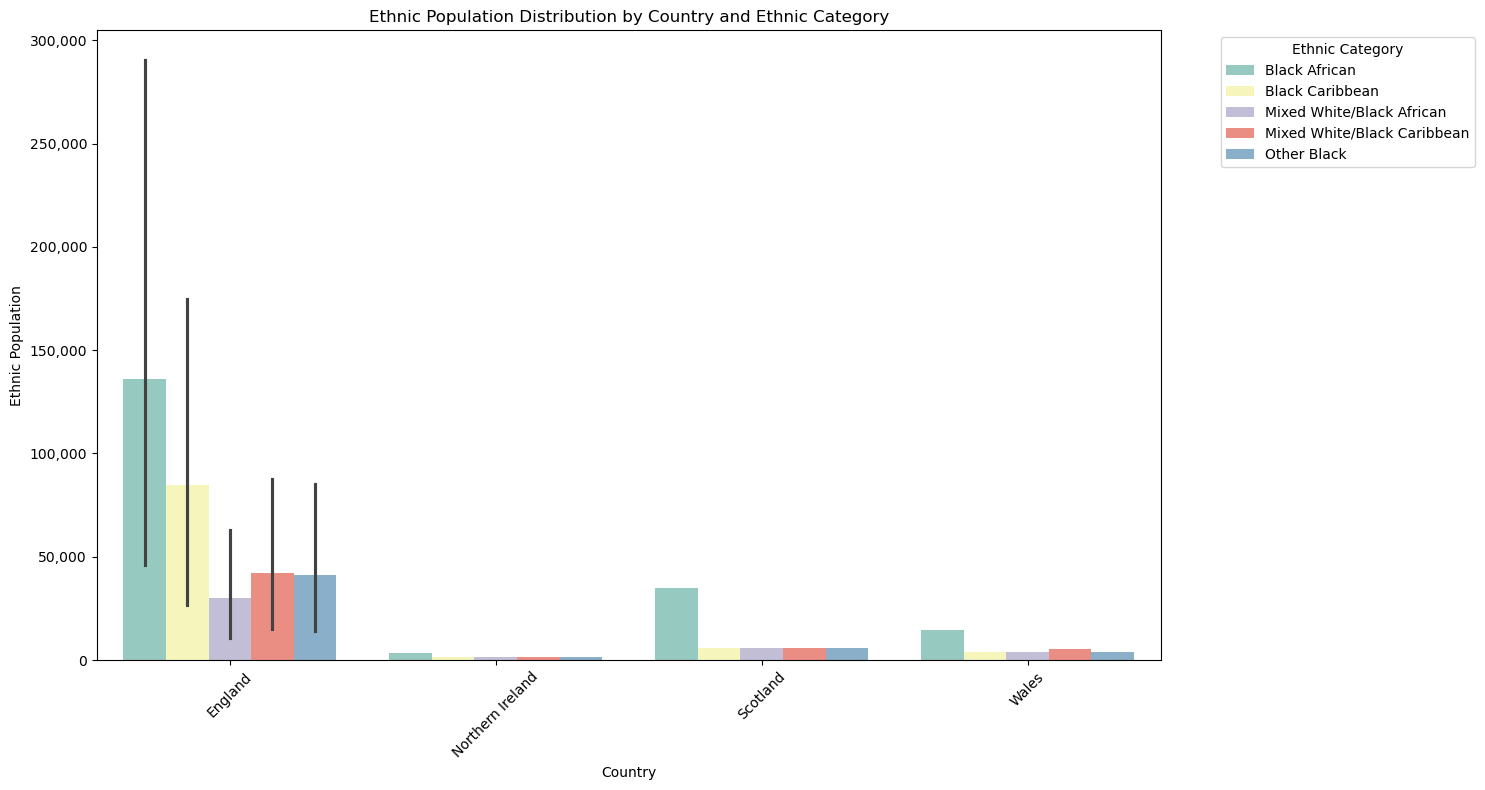


Numerical Summary of Ethnic Distribution:
Ethnic Category                      Black African  Black Caribbean  \
Country          Region                                               
England          East Midlands               46028            24542   
                 London                     577088           344597   
                 North East                  22728             5682   
                 North West                 113193            61338   
                 South West                  28350            16538   
                 West Midlands               89997            86794   
                 Yorkshire & Humber          74634            52244   
Northern Ireland Northern Ireland             3435             1718   
Scotland         Scotland                    34802             5801   
Wales            Wales                       14768             3692   

Ethnic Category                      Mixed White/Black African  \
Country          Region               

In [320]:
# First, let's aggregate the data
ethnic_distribution = ethnic_population.groupby(['Country', 'Region', 'Ethnic Category'])['Ethnic Population'].sum().reset_index()

# Create a grouped bar plot
plt.figure(figsize=(15, 8))

# Create the grouped bar plot using seaborn
sns.barplot(data=ethnic_distribution,
            x='Country',
            y='Ethnic Population',
            hue='Ethnic Category',
            palette='Set3')

# Customize the plot
plt.title('Ethnic Population Distribution by Country and Ethnic Category')
plt.xlabel('Country')
plt.ylabel('Ethnic Population')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Adjust legend
plt.legend(title='Ethnic Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add comma separator to y-axis values
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Print the numerical summary
print("\nNumerical Summary of Ethnic Distribution:")
summary = ethnic_distribution.pivot_table(
    values='Ethnic Population',
    index=['Country', 'Region'],
    columns='Ethnic Category',
    aggfunc='sum',
    fill_value=0
).round(0)
print(summary)

##### Key Insights:

Geographic Distribution:<br>
England shows significantly higher populations across all ethnic categories
Scotland has the second-largest populations, but significantly lower than England
Wales and Northern Ireland show relatively small ethnic populations
This aligns with known demographic patterns in the UK

Ethnic Category Patterns:<br>
Black African (mint green) represents the largest ethnic group in most countries
Black Caribbean (light yellow) is the second largest group, particularly in England
Mixed ethnicities (White/Black African and White/Black Caribbean) show similar proportions
"Other Black" category shows consistent presence across regions

Notable Observations:<br>
England's Black African population (~135,000) is substantially larger than other groups
England's Black Caribbean population (~85,000) forms a significant second group
Mixed ethnicity populations are more prevalent in England than other countries
Scotland shows a notable Black African population but much smaller than England
Wales and Northern Ireland show much smaller but still measurable ethnic populations

Proportional Distribution:<br>
England accounts for approximately 80-85% of the total ethnic population
The distribution pattern suggests concentrated urban settlements
Mixed ethnicity categories suggest established communities with intergenerational presence

***

In [321]:
ethnic_population_loc = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/ethnic_population_locations.csv')
ethnic_population_loc.head()

,City,Region,Community Centers,Coordinates - Community Centers,Cultural Associations,Coordinates - Cultural Associations,Religious Institutions,Coordinates - Religious Institutions
0,Greater London,London,Africa Centre,"51.4994° N, 0.1000° W",Black Cultural Archives,"51.4654° N, 0.1144° W",KICC Prayer City,"51.5074° N, 0.1278° W"
1,Greater London,London,Nigerian Community Centre,"51.4734° N, 0.0698° W",African Caribbean Business Network,"51.4994° N, 0.1000° W",Ruach City Church,"51.4613° N, 0.1156° W"
2,Greater London,London,Caribbean Resources Centre,"51.4626° N, 0.1147° W",Ghana Union London,"51.5074° N, 0.1278° W",Jesus House,"51.5505° N, 0.0557° W"
3,Greater London,London,African & Caribbean Mental Health,"51.5505° N, 0.0557° W",Nigerian Association UK,"51.5311° N, 0.1222° W",New Testament Church,"51.4626° N, 0.1147° W"
4,Greater London,London,Brixton Community Centre,"51.4613° N, 0.1156° W",Caribbean Cultural Association,"51.4613° N, 0.1156° W",Kingsway International,"51.5311° N, 0.1222° W"


In [322]:
ethnic_population_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   City                                  140 non-null    object
 1   Region                                140 non-null    object
 2   Community Centers                     140 non-null    object
 3   Coordinates - Community Centers       140 non-null    object
 4   Cultural Associations                 140 non-null    object
 5   Coordinates - Cultural Associations   140 non-null    object
 6   Religious Institutions                140 non-null    object
 7   Coordinates - Religious Institutions  140 non-null    object
dtypes: object(8)
memory usage: 8.9+ KB


In [323]:
# Regional summary
regional_summary = ethnic_population_loc.groupby('Region').agg({
    'Community Centers': 'count',
    'Cultural Associations': 'count',
    'Religious Institutions': 'count'
}).reset_index()
regional_summary

,Region,Community Centers,Cultural Associations,Religious Institutions
0,East Midlands,20,20,20
1,London,10,10,10
2,North East,10,10,10
3,North West,20,20,20
4,Northern Ireland,10,10,10
5,Scotland,20,20,20
6,South West,10,10,10
7,Wales,10,10,10
8,West Midlands,10,10,10
9,Yorkshire & Humber,20,20,20


##### Key Insights:

Regional Distribution Pattern:<br>
Four regions show higher concentration (20 each) of institutions:<br>
East Midlands<br>
North West<br>
Scotland<br>
Yorkshire & Humber<br>

The remaining six regions have uniform distribution (10 each):<br>
London<br>
North East<br>
Northern Ireland<br>
South West<br>
Wales<br>
West Midlands<br>

Institutional Balance:<br>
Each region shows equal distribution across all three types of institutions:<br>
Community Centers<br>
Cultural Associations<br>
Religious Institutions<br>
This suggests a balanced approach to community support infrastructure

Geographic Coverage:<br>
Total of 140 institutions across all regions
Even split between high-density (20 institutions) and standard-density (10 institutions) regions
Broad geographic coverage across the UK, including all major regions

Notable Observations:<br>
Surprisingly, London shows standard density despite its large population
Strong presence in northern regions (Yorkshire & Humber, North West)
Equal representation across different types of community organizations suggests coordinated planning

***

In [324]:
immigration = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Apol1_UK/Datasets/inmigration_to_uk.csv')
immigration.head()

,Country,Ethnic group,Year of arrival in the UK,Population
0,England and Wales,"Black, Black British, Black Welsh, Caribbean o...",Does not apply,0
1,England and Wales,"Black, Black British, Black Welsh, Caribbean o...",Born in the UK,531383
2,England and Wales,"Black, Black British, Black Welsh, Caribbean o...",Arrived before 1951,132
3,England and Wales,"Black, Black British, Black Welsh, Caribbean o...",Arrived 1951 to 1960,1363
4,England and Wales,"Black, Black British, Black Welsh, Caribbean o...",Arrived 1961 to 1970,7573


In [325]:
immigration['Year of arrival in the UK'].unique()

array(['Does not apply', 'Born in the UK', 'Arrived before 1951',
       'Arrived 1951 to 1960', 'Arrived 1961 to 1970',
       'Arrived 1971 to 1980', 'Arrived 1981 to 1990',
       'Arrived 1991 to 2000', 'Arrived 2001 to 2010',
       'Arrived 2011 to 2013', 'Arrived 2014 to 2016',
       'Arrived 2017 to 2019', 'Arrived 2020 to 2021'], dtype=object)

In [326]:
# Drop rows where the column equals 'Does not apply' or 'Born in the UK'
inmigration = immigration[~immigration['Year of arrival in the UK'].isin(['Does not apply', 'Born in the UK'])]

# Verify the unique values remaining in the column
print("Remaining arrival periods:")
print(immigration['Year of arrival in the UK'].unique())

Remaining arrival periods:
['Does not apply' 'Born in the UK' 'Arrived before 1951'
 'Arrived 1951 to 1960' 'Arrived 1961 to 1970' 'Arrived 1971 to 1980'
 'Arrived 1981 to 1990' 'Arrived 1991 to 2000' 'Arrived 2001 to 2010'
 'Arrived 2011 to 2013' 'Arrived 2014 to 2016' 'Arrived 2017 to 2019'
 'Arrived 2020 to 2021']


In [327]:
# Create a dictionary mapping arrival periods to group numbers
arrival_groups = {
    'Arrived before 1951': 1,
    'Arrived 1951 to 1960': 2,
    'Arrived 1961 to 1970': 3,
    'Arrived 1971 to 1980': 4,
    'Arrived 1981 to 1990': 5,
    'Arrived 1991 to 2000': 6,
    'Arrived 2001 to 2010': 7,
    'Arrived 2011 to 2013': 8,
    'Arrived 2014 to 2016': 9,
    'Arrived 2017 to 2019': 10,
    'Arrived 2020 to 2021': 11
}

# Create new column with group numbers
immigration['Arrival_Group'] = immigration['Year of arrival in the UK'].map(arrival_groups)

# Verify the mapping
print("\nVerification of mapping:")
print(immigration[['Year of arrival in the UK', 'Arrival_Group']].drop_duplicates().sort_values('Arrival_Group'))


Verification of mapping:
   Year of arrival in the UK  Arrival_Group
2        Arrived before 1951            1.0
3       Arrived 1951 to 1960            2.0
4       Arrived 1961 to 1970            3.0
5       Arrived 1971 to 1980            4.0
6       Arrived 1981 to 1990            5.0
7       Arrived 1991 to 2000            6.0
8       Arrived 2001 to 2010            7.0
9       Arrived 2011 to 2013            8.0
10      Arrived 2014 to 2016            9.0
11      Arrived 2017 to 2019           10.0
12      Arrived 2020 to 2021           11.0
0             Does not apply            NaN
1             Born in the UK            NaN


In [328]:
immigration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    65 non-null     object 
 1   Ethnic group               65 non-null     object 
 2   Year of arrival in the UK  65 non-null     object 
 3   Population                 65 non-null     int64  
 4   Arrival_Group              55 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ KB


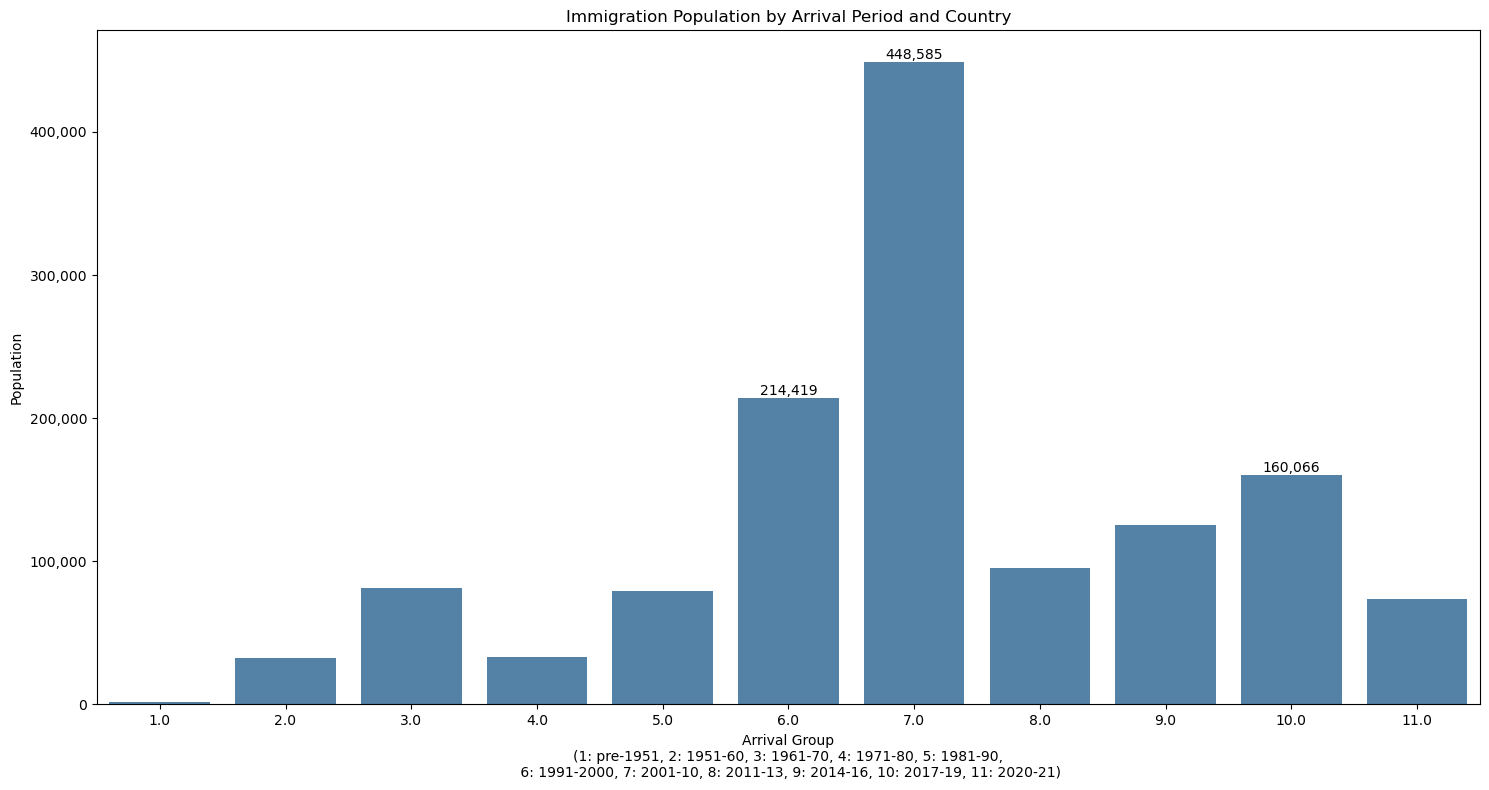

In [329]:
# Aggregate population by arrival group and country
population_by_group = immigration.groupby(['Country', 'Arrival_Group'])['Population'].sum().reset_index()

# Create the visualization
plt.figure(figsize=(15, 8))

# Create grouped bar plot
ax = sns.barplot(data=population_by_group, 
                x='Arrival_Group', 
                y='Population',
                color='steelblue')

# Add values for top 3 bars
top_3_groups = population_by_group.nlargest(3, 'Population')
for idx in top_3_groups.index:
    value = top_3_groups.loc[idx, 'Population']
    group = top_3_groups.loc[idx, 'Arrival_Group']
    plt.text(group-1, value, f'{value:,.0f}', 
             ha='center', va='bottom')

# Customize the plot
plt.title('Immigration Population by Arrival Period and Country')
plt.xlabel('Arrival Group\n(1: pre-1951, 2: 1951-60, 3: 1961-70, 4: 1971-80, 5: 1981-90,\n 6: 1991-2000, 7: 2001-10, 8: 2011-13, 9: 2014-16, 10: 2017-19, 11: 2020-21)')
plt.ylabel('Population')

# Format y-axis with comma separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Rotate x-axis labels if needed
plt.xticks(rotation=0)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

##### Key Insights:

Peak Immigration Period:<br>
Group 7 (2001-2010) shows the highest immigration numbers with 448,585 arrivals
This represents a significant spike compared to all other periods
Suggests major immigration policy changes or global events influencing migration patterns

Secondary Peak:<br>
Group 6 (1991-2000) shows the second-highest numbers with 214,419 arrivals
Indicates a building trend that led to the 2001-2010 peak
Represents a significant increase from previous decades

Recent Trends:<br>
Group 10 (2017-2019) shows a notable population of 160,066 immigrants
Recent periods maintain relatively high numbers compared to pre-1990 periods
Suggests sustained immigration levels in recent years

Historical Pattern:<br>
Groups 1-5 (pre-1951 through 1990) show consistently lower numbers
Early periods (Groups 1-2) show minimal immigration
Gradual increase through Groups 3-5, but still significantly lower than recent periods

Temporal Evolution:<br>
Clear upward trend from 1951 to 2010
Post-2010 shows a decrease from the peak but maintains higher levels than pre-1990
Most recent period (Group 11, 2020-2021) shows lower numbers, possibly due to COVID-19 pandemic

##### Age ranges for the top 3 immigration groups as of 2024:

Group 7 (2001-2010) - 448,585 people:<br>
Arrived 14-23 years ago

If they arrived as:<br>
Young adults (20-30): Now 34-53 years old<br>
Middle-aged (31-50): Now 45-73 years old<br>
Children (under 18): Now 18-41 years old<br>
This represents likely the most economically active group currently<br>
Many would have established families and careers in the UK<br>

Group 6 (1991-2000) - 214,419 people:<br>
Arrived 24-33 years ago<br>

If they arrived as:<br>
Young adults (20-30): Now 44-63 years old<br>
Middle-aged (31-50): Now 55-83 years old<br>
Children (under 18): Now 28-51 years old<br>
Many in this group would be in senior career positions or approaching retirement<br>
Likely to have well-established community ties<br>

Group 10 (2017-2019) - 160,066 people:<br>
Arrived 5-7 years ago<br>

If they arrived as:<br>
Young adults (20-30): Now 25-37 years old<br>
Middle-aged (31-50): Now 36-57 years old<br>
Children (under 18): Now 5-25 years old<br>
Represents the most recently established significant group<br>
Likely still in period of career development and community integration<br>
Includes young families and professionals<br>

***

##### Summary:

1. Population Distribution and Risk Factors:<br>
- Greater London shows the highest concentration of at-risk populations (868,161)
- Major urban centers (West Midlands, Greater Manchester) form secondary clusters
- Strong correlation between urban areas and APOL1 risk factors
- Immigration patterns suggest significant growth in at-risk populations since 2001

2. Healthcare Infrastructure:<br>
- Coverage varies significantly across regions (45-75% coverage)
- Testing rates show concerning gaps:<br>
  * East of England: 93% coverage gap
  * West Midlands: 89% coverage gap
  * North West: 88% coverage gap
- Community support infrastructure varies:<br>
  * Higher density in East Midlands, North West, Scotland, Yorkshire & Humber
  * Standard density in other regions including London

3. Immigration and Age Demographics:<br>
- Peak immigration period (2001-2010): 448,585 people, now aged 34-73
- Secondary peak (1991-2000): 214,419 people, now aged 44-83
- Recent significant group (2017-2019): 160,066 people, now aged 25-57
- Age distribution suggests multi-generational risk patterns

4. Critical Areas for Intervention:<br>
Priority Regions based on combined factors:
- Greater London: Highest population, good coverage (75%)
- West Midlands: High population, poor coverage (65%)
- Greater Manchester: Significant population, moderate coverage (62%)
- Yorkshire & Humber: Growing population, needs improved coverage<br>

Recommendations:<br>

1. Healthcare Planning:<br>
- Expand testing facilities in areas with >85% coverage gaps
- Focus on regions with high immigration from at-risk populations
- Develop age-specific screening programs
- Implement targeted healthcare interventions in urban centers

2. Resource Allocation:<br>
- Prioritize areas with high population density and poor coverage
- Increase community support in regions with growing immigrant populations
- Develop specialized healthcare facilities in identified hotspots
- Enhanced support for regions with aging at-risk populations<br>

This analysis suggests a need for a multi-faceted approach to APOL1 screening and treatment, with particular attention to urban centers and areas with significant immigration history. The combination of demographic trends, healthcare infrastructure, and community support systems will be crucial in addressing the healthcare needs of potential APOL1-positive patients across the UK.

***